 <br />
<img src= "https://github.com/nooksack-indian-tribe/CurvyLapseRate/blob/master/Images4Notebooks/nooksack-tribe-logo.jpg?raw=true"
style="float:left;width:175px;padding:20px">   
<br />
# Elevation distributed microclimatology data in the Nooksack Watershed

## Case study:  Nooksack River Watershed 
Code for generating lapse rates from temperature sensor data for analysis of elevation distributed micro-climatology processes in a coastal glaciated watershed.  For 2016-2018 datasets, variables include air temperature, ground temperature, and relative humidity. Code generates visualization and publication of daily data in multiple formats (1) daily data in python dictionaries for analysis (2) daily data for visualization and publication on HydroServer at data.cuahsi.org (ODM1 format), and (3) archive publication on the HydroShare repository (ODM2 format)). This data is compiled to digitally observe the Nooksack Watershed.

**Use this Jupyter Notebook to:** <br />
* 1. Import daily sensor data from ODM2 formatted file <br /> 
* 2. Plot daily data and elevation lapse rates <br /> 
* 3. Save interactive software requirements for Binder.  <br />

Use other Jupyter Notebooks to: <br />
* 1. Import & plot 3-4 hourly raw sensor data for quality control, <br /> 
* 2. Filter, plot & export daily data, <br /> 
* 3. Estimate, plot, & export daily lapse rates,     <br />
* 4. Generate annual average lapse rates at different elevations
* 5. Generate monthly time series and monthly average lapse rates at different elevations,  <br />
* 6. Publish data on HydroShare.  <br />

<br /> <img src="https://github.com/nooksack-indian-tribe/CurvyLapseRate/blob/master/Images4Notebooks/UWCEE_logo.jpg?raw=true" style="float:right;width:120px;padding:20px">  
#### A Watershed Dynamics Model by the Watershed Dynamics Research Group in the Civil and Environmental Engineering Department at the University of Washington 

## 1. Import Tools and Data

### Import software libraries

In [6]:
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.dates as mdates

### Import elevation for each Lapse Rate sensor as a floating point number

In [7]:
Elevation= np.genfromtxt('Elevation.csv', delimiter=',',skip_header=1)
Elevation

array([[         nan,  506.87     ],
       [         nan,          nan],
       [         nan,  664.4315757],
       [         nan, 1056.080463 ],
       [         nan, 1286.498019 ],
       [         nan, 1575.129534 ],
       [         nan, 1743.066138 ]])

#### Compare the elevations imported to the published information. 
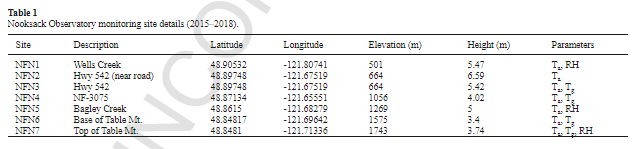

In [8]:
elev_NFN1=np.array((Elevation[0][1]), dtype='float64') #first row
#skip missing value, elevation is the same for site 2 and 3; site 2 discontinued
elev_NFN3=np.array((Elevation[2][1]), dtype='float64') 
elev_NFN4=np.array((Elevation[3][1]), dtype='float64')
elev_NFN5=np.array((Elevation[4][1]), dtype='float64')
elev_NFN6=np.array((Elevation[5][1]), dtype='float64')
elev_NFN7=np.array((Elevation[6][1]), dtype='float64')


In [9]:
elevations_km=np.array([elev_NFN1/1000, elev_NFN3/1000, elev_NFN4/1000, elev_NFN5/1000, 
                        elev_NFN6/1000, elev_NFN7/1000]) 
print(elevations_km)

[0.50687    0.66443158 1.05608046 1.28649802 1.57512953 1.74306614]


### Import data for each Lapse Rate sensor

Missing data = NaN (not a number)

In [67]:
lapse_ODM2 = pd.read_csv('NIT_YODA_2019-11-26_data_values.csv')
lapse_ODM2

,DateTime,UTC Offset,NFN1_AT,NFN1_RH,NFN3_AT,NFN3_ST,NFN4_AT,NFN4_ST,NFN5_AT,NFN5_RH,NFN6_AT,NFN6_ST,NFN7_AT,NFN7_ST,NFN7_RH
0,12/4/2015,-8.0,NaN,NaN,1.8750,NaN,0.5000,1.7500,NaN,NaN,-2.2500,0.5,-3.046000,0.5,106.050625
1,12/5/2015,-8.0,NaN,NaN,2.3125,NaN,0.9375,1.0000,NaN,NaN,-2.0000,0.5,-2.794750,0.5,106.274750
2,12/6/2015,-8.0,NaN,NaN,3.5000,NaN,2.0000,0.9375,NaN,NaN,-1.1250,0.5,-1.914125,0.5,106.942500
3,12/7/2015,-8.0,NaN,NaN,4.0000,NaN,2.8125,1.1875,NaN,NaN,-0.1250,0.5,-0.845500,0.5,107.994375
4,12/8/2015,-8.0,NaN,NaN,5.0000,NaN,3.6250,1.5000,NaN,NaN,1.0625,0.5,0.034250,0.5,107.790500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,9/26/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1028,9/27/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,9/28/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1030,9/29/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Index the dataset to the date. Check out the start and end timestamps. Compare Datatypes for Date.

In [68]:
lapse_ODM2['date'] = pd.to_datetime(lapse_ODM2['DateTime'])
lapse_ODM2 = lapse_ODM2.set_index('DateTime')
date = lapse_ODM2['date'].astype('O')
print("Dates stored as dtype=Objects look like this:")
print(type(date))
print(date)
print("")
print("Dates stored as dtype='datetime64[ns]' look like this:")
date = pd.DatetimeIndex(date)
print(type(date))
print(date)

Dates stored as dtype=Objects look like this:
<class 'pandas.core.series.Series'>
DateTime
12/4/2015    2015-12-04 00:00:00
12/5/2015    2015-12-05 00:00:00
12/6/2015    2015-12-06 00:00:00
12/7/2015    2015-12-07 00:00:00
12/8/2015    2015-12-08 00:00:00
                    ...         
9/26/2018    2018-09-26 00:00:00
9/27/2018    2018-09-27 00:00:00
9/28/2018    2018-09-28 00:00:00
9/29/2018    2018-09-29 00:00:00
9/30/2018    2018-09-30 00:00:00
Name: date, Length: 1032, dtype: object

Dates stored as dtype='datetime64[ns]' look like this:
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
DatetimeIndex(['2015-12-04', '2015-12-05', '2015-12-06', '2015-12-07',
               '2015-12-08', '2015-12-09', '2015-12-10', '2015-12-11',
               '2015-12-12', '2015-12-13',
               ...
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30'],
      

### Create a new daily timeseries dictionary containing only air temperature (_AT)

In [69]:
daily_T={}
daily_T['date']=date
daily_T['NFN1']=lapse_ODM2['NFN1_AT']
daily_T['NFN3']=lapse_ODM2['NFN3_AT']
daily_T['NFN4']=lapse_ODM2['NFN4_AT']
daily_T['NFN5']=lapse_ODM2['NFN5_AT']
daily_T['NFN6']=lapse_ODM2['NFN6_AT']
daily_T['NFN7']=lapse_ODM2['NFN7_AT']



(735936.0, 736967.0)

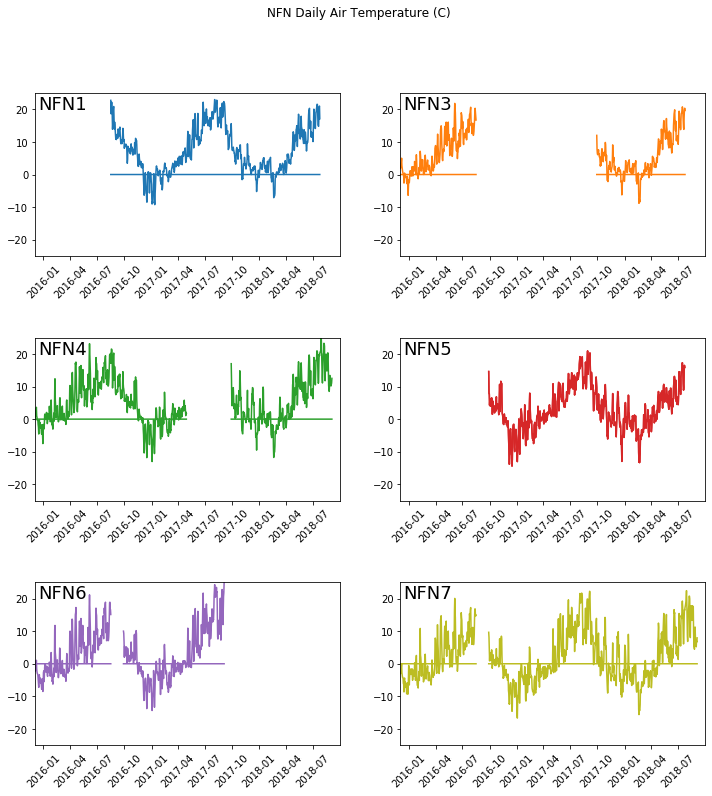

In [14]:
Tmaxlim = 25
Tminlim = -25

fig = plt.figure('Plot Locations')
fig.suptitle('NFN Daily Air Temperature (C)')
fig.subplots_adjust(hspace=.5)
fig.set_size_inches(12,12)

ax1 = fig.add_subplot(321)
ax1.plot(daily_T['date'],daily_T['NFN1'],'tab:blue')
ax1.plot(daily_T['date'],daily_T['NFN1']*0,'tab:blue')#freeze line
plt.text(daily_T['date'][10], 20, s= 'NFN1', fontsize=18)
plt.xticks(rotation=45)
plt.ylim((Tminlim,Tmaxlim))
end=len(daily_T['date'])-1
plt.xlim(daily_T['date'][0],daily_T['date'][end])

ax2 = fig.add_subplot(322)
ax2.plot(daily_T['date'],daily_T['NFN3'], 'tab:orange')
ax2.plot(daily_T['date'],daily_T['NFN3']*0, 'tab:orange')#freeze line
plt.text(daily_T['date'][10], 20, s= 'NFN3', fontsize=18)
plt.xticks(rotation=45)
plt.ylim((Tminlim,Tmaxlim))
end=len(daily_T['date'])-1
plt.xlim(daily_T['date'][0],daily_T['date'][end])

ax3 = fig.add_subplot(323)
ax3.plot(daily_T['date'],daily_T['NFN4'], 'tab:green')
ax3.plot(daily_T['date'],daily_T['NFN4']*0, 'tab:green')#freeze line
plt.text(daily_T['date'][10], 20, s= 'NFN4', fontsize=18)
plt.xticks(rotation=45)
plt.ylim((Tminlim,Tmaxlim))
end=len(daily_T['date'])-1
plt.xlim(daily_T['date'][0],daily_T['date'][end])

ax4 = fig.add_subplot(324)
ax4.plot(daily_T['date'],daily_T['NFN5'], 'tab:red')
ax4.plot(daily_T['date'],daily_T['NFN5'], 'tab:red')#freeze line
plt.text(daily_T['date'][10], 20, s= 'NFN5', fontsize=18)
plt.xticks(rotation=45)
plt.ylim((Tminlim,Tmaxlim))
end=len(daily_T['date'])-1
plt.xlim(daily_T['date'][0],daily_T['date'][end])

ax5 = fig.add_subplot(325)
ax5.plot(daily_T['date'],daily_T['NFN6'], 'tab:purple')
ax5.plot(daily_T['date'],daily_T['NFN6']*0, 'tab:purple')#freeze line
plt.text(daily_T['date'][10], 20, s= 'NFN6', fontsize=18)
plt.xticks(rotation=45)
plt.ylim((Tminlim,Tmaxlim))
end=len(daily_T['date'])-1
plt.xlim(daily_T['date'][0],daily_T['date'][end])

ax6 = fig.add_subplot(326)
ax6.plot(daily_T['date'],daily_T['NFN7'], 'tab:olive')
ax6.plot(daily_T['date'],daily_T['NFN7']*0, 'tab:olive')#freeze line
plt.text(daily_T['date'][10], 20, s= 'NFN7', fontsize=18)
plt.xticks(rotation=45)
plt.ylim((Tminlim,Tmaxlim))
end=len(daily_T['date'])-1
plt.xlim(daily_T['date'][0],daily_T['date'][end])




In [15]:
def plot_oneyear(one_year,title):
    fig1, ax1=plt.subplots(1,1,figsize=(10, 5))
    one_year['NFN1_AT'].plot()
    one_year['NFN3_AT'].plot() #  missing part of July
    one_year['NFN4_AT'].plot() #missing part of July
    one_year['NFN5_AT'].plot() 
    one_year['NFN6_AT'].plot()
    one_year['NFN7_AT'].plot() #missing July 
    plt.ylabel('Temperature (C)')
    plt.title(title)
    plt.legend(loc='best')
    plt.xticks(rotation=45)


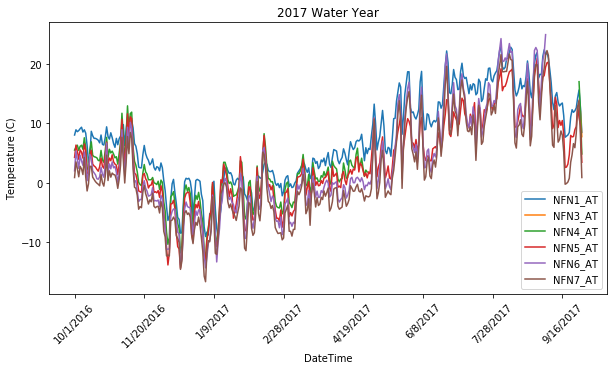

In [16]:
one_year2017 = lapse_ODM2['10/1/2016':'9/30/2017']
title ='2017 Water Year'
plot_oneyear(one_year2017,title)

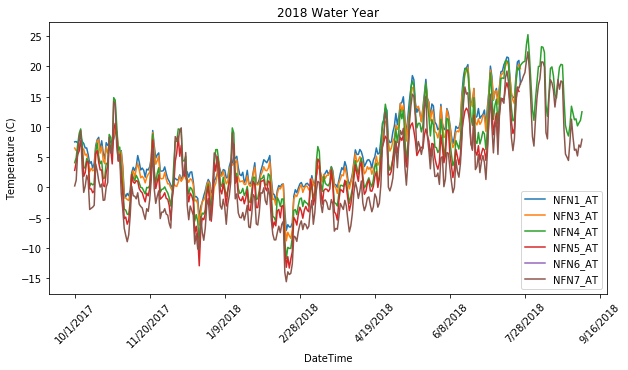

In [17]:
one_year2018 = lapse_ODM2['10/1/2017':'9/30/2018']
title ='2018 Water Year'
plot_oneyear(one_year2018,title)

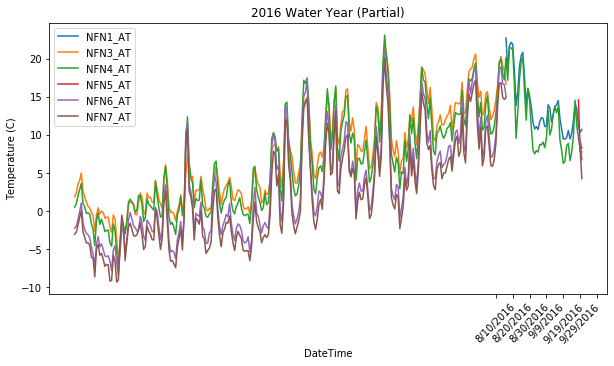

In [18]:
one_year2016 = lapse_ODM2['12/4/2015':'9/30/2016']
title ='2016 Water Year (Partial)'
plot_oneyear(one_year2016,title)

In [19]:
lapse_ODM2_T=lapse_ODM2

In [20]:
lapse_ODM2_T.shape

(1032, 15)

## Build a function to analyze, plot and save monthly lapse rate (Figure 3a)

In [75]:
def analyze_one_month(one_month,label):
    
    """Return calculation for mean monthly Temp and plot daily values"""
    daily_T={}
    daily_T['NFN1']=one_month['NFN1_AT']
    daily_T['NFN3']=one_month['NFN3_AT']
    daily_T['NFN4']=one_month['NFN4_AT']
    daily_T['NFN5']=one_month['NFN5_AT']
    daily_T['NFN6']=one_month['NFN6_AT']
    daily_T['NFN7']=one_month['NFN7_AT']
    daily_T['date']=date
    
    mean_T_month={}
    mean_T_month['NFN1_AT'] = one_month['NFN1_AT'].mean()
    mean_T_month['NFN3_AT'] = one_month['NFN3_AT'].mean()
    mean_T_month['NFN4_AT'] = one_month['NFN4_AT'].mean()
    mean_T_month['NFN5_AT'] = one_month['NFN5_AT'].mean()
    mean_T_month['NFN6_AT'] = one_month['NFN6_AT'].mean()
    mean_T_month['NFN7_AT'] = one_month['NFN7_AT'].mean()
    
    print("Is there a missing {value}? Nan? ".format(value=label) )
    print('Mean monthly value for each location')
    print(list(mean_T_month.values())) 
      
    ax = plt.figure(1, figsize = (7,5))
    #print(daily_T['NFN1'].keys)
    daily_T['NFN1'].plot(label="NFN1")
    daily_T['NFN3'].plot(label="NFN3")
    daily_T['NFN4'].plot(label="NFN4")
    daily_T['NFN5'].plot(label="NFN5")
    daily_T['NFN6'].plot(label="NFN6")
    daily_T['NFN7'].plot(label="NFN7")
    plt.ylabel('Temperature (C)')
    plt.title(label)
    #plt.legend(loc='best')
    plt.xticks(rotation=45)
    #box = ax.get_position()
    plt.xlabel('')
    ax.legend(loc='center left', bbox_to_anchor=(0.95, 0.75))
    plt.savefig('figure3a_2020.png',dpi=900)
        
    return mean_T_month 

In [76]:
label = "Air Temperature by Location (April, 2018)"
apr2018 = lapse_ODM2['4/1/2018':'4/30/2018']
#apr2018

Is there a missing Air Temperature by Location (April, 2018)? Nan? 
Mean monthly value for each location
[5.748100000000002, 4.5500000001666665, 3.2333333331, 1.8057833333333333, nan, -0.6014333333333333]


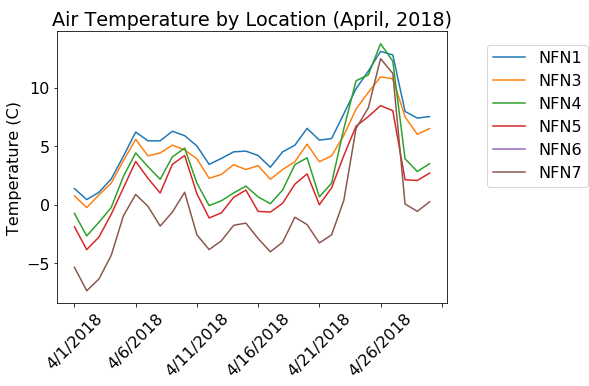

In [77]:

mean_T_apr = analyze_one_month(apr2018,label)


## Explore lapse rate monthly average, elevation, and slope compared to annual average estimates used in hydrologic modeling. 
### Build a function to analyze, plot and save lapse rate example (Figure 3b)

In [78]:
meanmonthly_T={}
meanmonthly_T['NFN1']=mean_T_apr['NFN1_AT']
meanmonthly_T['NFN3']=mean_T_apr['NFN3_AT']
meanmonthly_T['NFN4']=mean_T_apr['NFN4_AT']
meanmonthly_T['NFN5']=mean_T_apr['NFN5_AT']
#meanmonthly_T['NFN6']=mean_T_apr['NFN6_AT']
meanmonthly_T['NFN7']=mean_T_apr['NFN7_AT']
#elevations_km_mo

elevations_km_mo = np.array([elevations_km[0],
                             elevations_km[1],
                             elevations_km[2],
                             elevations_km[3],
                             #elevations_km[4],
                             elevations_km[5]]) 
print('Elevations for all Locations')
print(elevations_km)
print('Elevations for Locations with data in April 2018')
print(elevations_km_mo)

Elevations for all Locations
[0.50687    0.66443158 1.05608046 1.28649802 1.57512953 1.74306614]
Elevations for Locations with data in April 2018
[0.50687    0.66443158 1.05608046 1.28649802 1.74306614]


In [79]:
list(meanmonthly_T.values())

[5.748100000000002,
 4.5500000001666665,
 3.2333333331,
 1.8057833333333333,
 -0.6014333333333333]

In [80]:
mean_T_apr

{'NFN1_AT': 5.748100000000002,
 'NFN3_AT': 4.5500000001666665,
 'NFN4_AT': 3.2333333331,
 'NFN5_AT': 1.8057833333333333,
 'NFN6_AT': nan,
 'NFN7_AT': -0.6014333333333333}

In [81]:
sl_mo, int_mo, r_value, p_value, std_err = stats.linregress(elevations_km_mo, list(meanmonthly_T.values()))
print(sl_mo)

-4.966446921253824


In [82]:
def lapse_one_month(elevations_km_mo,one_monthT_dictionary,label):
    
    one_month = list(one_monthT_dictionary.values())
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(elevations_km_mo, one_month)
    
    plt.figure(figsize=(12,8)) 
    
    ax = plt.subplot(111)

    plt.plot(elevations_km_mo,one_month,  'ro',label='Observed monthly mean temperature - April 2018')
    plt.plot(elevations_km_mo,elevations_km_mo * slope + intercept,'b-',label='NFN Monthly lapse rate April 2018 {value} C/Km'.format(value=round(slope,1)))
    plt.plot(elevations_km_mo,elevations_km_mo * (-6.5) + intercept, 'm-',label='Annual lapse rate = -6.5 C/Km (Stone & Carlson, 1979)')
    plt.plot(elevations_km_mo,elevations_km_mo * (-4.5) + intercept, 'g-',label='Annual lapse rate = -4.5 C/Km (Minder et al., 2010)')
    plt.ylabel('Temperature (deg C)')
    plt.xlabel('Elevation (km)')

    fig.suptitle('Air temperature lapse rates across the domain, April 2018', fontsize=16)
    plt.rcParams.update({'font.size': 16})
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ax.set_xlim(xmin=0.4, xmax=1.8)
    ax.set_ylim(ymin=-2, ymax=6.5)
    fig.set_figwidth(8)

    fig.set_figheight(6)
    plt.savefig('april2018lapserate.jpg')
    plt.savefig('figure3b_2020.png',dpi=900)
    
    plt.show()

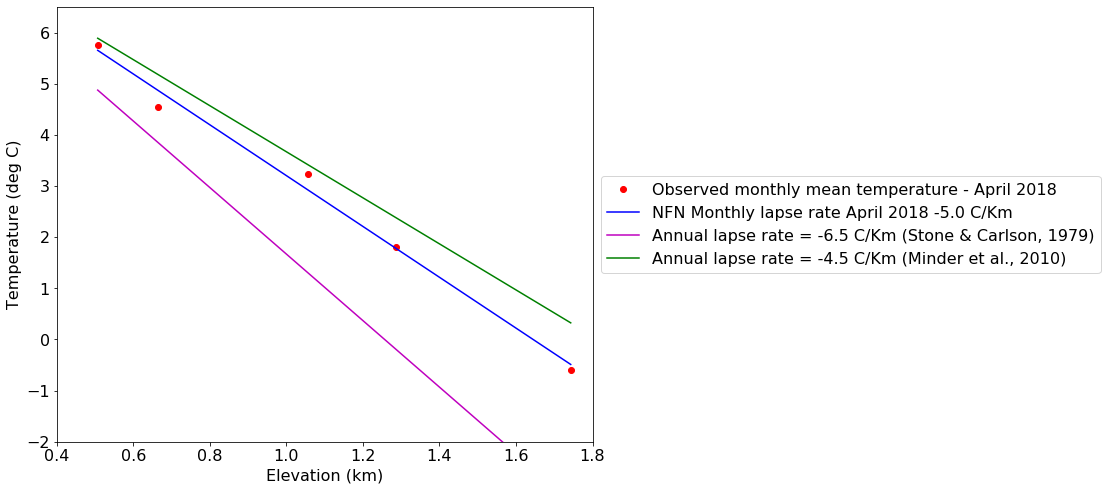

In [83]:
lapse_one_month(elevations_km_mo,meanmonthly_T,label)

## Check the software versions used in this notebook. 
### Add any updates or libraries added to the [Curvy Lapse Rate Binder requirements file.](https://github.com/nooksack-indian-tribe/CurvyLapseRate/blob/master/requirements.txt)

In [54]:
!pip freeze | findstr matplotlib
!pip freeze | findstr numpy
!pip freeze | findstr pandas
!pip freeze | findstr scipy

matplotlib==3.1.3
numpy==1.18.1
numpydoc==0.9.2
pandas==1.0.1
scipy==1.4.1


## Land Acknowledgement

The University of Washington acknowledges the Coast Salish peoples of this land, the land which touches the shared waters of all tribes and bands within the Suquamish, Tulalip and Muckleshoot nations.